# Burst Detection Using burst.py
This notebook shows how to use detect EEG bursts using burst.py

In [1]:
import numpy as np
import neurodsp

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt

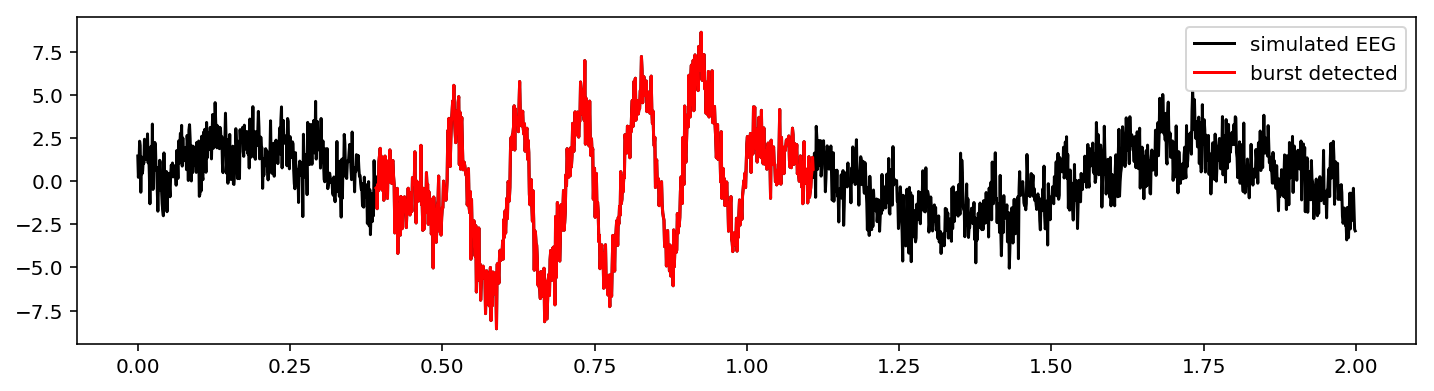

In [2]:
# Generate quasi-periodic data with an alpha burst
np.random.seed(0)
t = np.arange(0,2,.001)
x = np.random.randn(len(t)) + 2*np.sin(t*2*np.pi*1.3) + np.sin(t*2*np.pi*18-.3)
x[500:1000] += 5*np.sin(t[500:1000]*2*np.pi*10)
Fs = 1000

# Define the frequency band of interest
alpha = (8, 12)

# Detect bursts
bursting = neurodsp.detect_bursts(Fs, x, alpha, algorithm='deviation', thresh=(1.5, 3))

# Get indices for bursting
bursting_i = np.where(bursting)

# Plot original signal and bu
plt.figure(figsize=(12,3));
plt.plot(t, x, 'k', label='simulated EEG');
plt.plot(t[bursting_i], x[bursting_i], 'r', label='burst detected')
plt.legend(loc='best');